# __Genet Sebehat__
## __Machine Learning__
### __Course-End Project Problem Statement__

### __Employee Turnover Analytics__

#### __Problem scenario:__ 
An app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details. To develop a predictive model using machine learning techniques to identify key factors that contribute to employee turnover within an organization, allowing HR teams to proactively address potential issues and implement targeted retention strategies based on employee data like demographics, performance metrics, job satisfaction, and work environment factors, ultimately aiming to minimize the negative impact of high turnover on business operations.

To analyze employee data to identify key factors that significantly influence turnover across different departments and job roles, allowing for tailored retention strategies based on specific employee segments

#### __Goal of the project:__
To identify key factors that contribute to employee turnover within a company and develop a predictive model that can forecast which employees are likely to leave, allowing the organization to proactively implement strategies to retain valuable talent by understanding the underlying reasons behind employee departures and taking preventative measures. 

In [5]:
# Import the necessary libraries

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Load the data
df1 = pd.read_csv('HR_comma_sep[1].csv')

In [7]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df1.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


#### __Steps to perform:__

##### __1. Perform data quality checks by checking for missing values, if any.__

In [11]:
# Check for missing values
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- There are no null/missing values in the dataset

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
df1["satisfaction_level"].value_counts()

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: count, Length: 92, dtype: int64

In [15]:
df1["satisfaction_level"].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [16]:
df1["last_evaluation"].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [17]:
df1["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [18]:
df1["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [19]:
df1["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [20]:
df1["Work_accident"].unique()

array([0, 1], dtype=int64)

In [21]:
df1["left"].unique()

array([1, 0], dtype=int64)

In [22]:
df1["promotion_last_5years"].unique()

array([0, 1], dtype=int64)

In [23]:
df1["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [24]:
df1["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate quartiles and median value
percentile25 = df1['time_spend_company'].quantile(0.25)
percentile75 = df1['time_spend_company'].quantile(0.75)
median_value = df1['time_spend_company'].median()

print(f"25th percentile: {percentile25}")
print(f"75th percentile: {percentile75}")
print(f"Median value: {median_value}")


25th percentile: 3.0
75th percentile: 4.0
Median value: 3.0


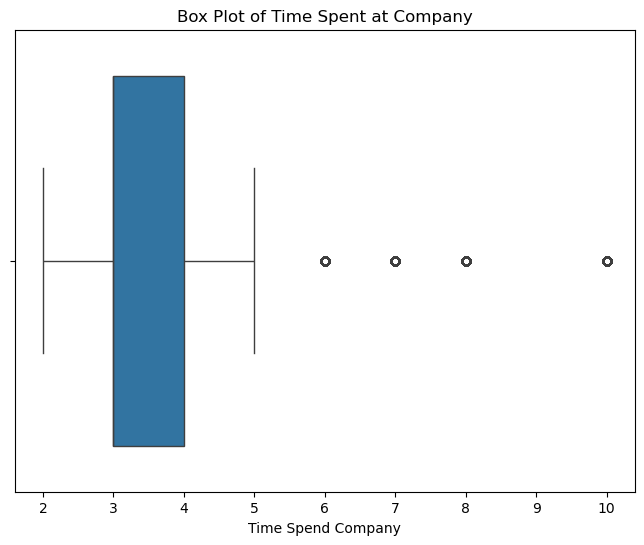

In [27]:
# Draw a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['time_spend_company'])
plt.title('Box Plot of Time Spent at Company')
plt.xlabel('Time Spend Company')
plt.show()


The box plot will provide a visual representation of the distribution of time_spend_company, highlighting the median, quartiles, and potential outliers.

##### __2. Understand what factors contributed most to employee turnover at EDA.__

2.1. Draw a heatmap of the correlation matrix between all numerical
features or columns in the data.

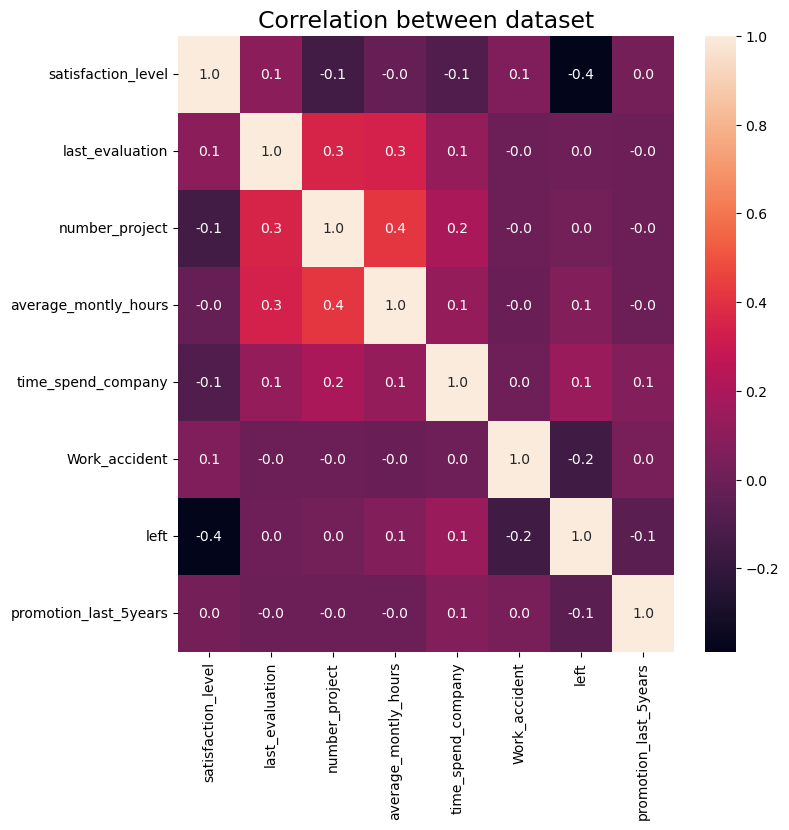

In [31]:
# Correlation heatmap
plt.figure(figsize=(8,8))
c=df1.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()

##### __Observation:__

- High Correlations: Several pairs of features exhibit strong positive correlations.
For example, "last_ evaluation" and "satisfaction_level" are highly correlated with each other. 

- Feature Groups:

2.2. Draw the distribution plot of:
- Employee Satisfaction (use column satisfaction_level)
- Employee Evaluation (use column last_evaluation)
- Employee Average Monthly Hours (use column average_montly_hours)

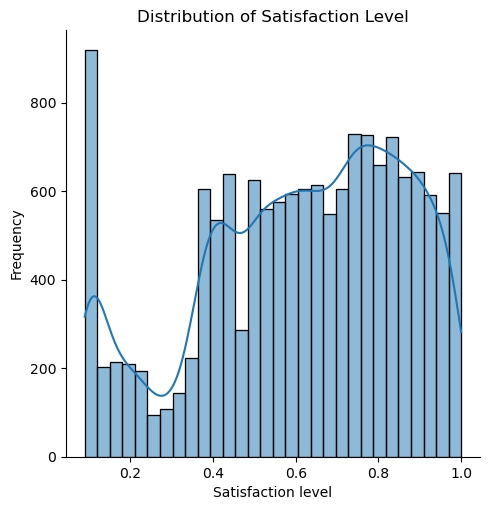

In [34]:
# distribution of Employee Satisfaction (use column satisfaction_level)
sns.displot(df1['satisfaction_level'], kde=True) # kde adds a density curve
plt.xlabel('Satisfaction level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Level')
plt.show()

1. Satisfaction Level

Distribution Analysis:

- The distribution of satisfaction_level typically ranges from 0 (very unsatisfied) to 1 (very satisfied).
- Shape: The plot may show a range of satisfaction levels with possible peaks around certain points, indicating clusters of employees with similar satisfaction levels.

Interpretation:
- Peaks at lower values may indicate a significant number of employees who are not satisfied with their job.
- Peaks at higher values suggest a group of employees who are highly satisfied.

Business Implication:
- Identifying satisfaction levels can help understand employee morale.
- Strategies can be implemented to improve satisfaction among those who are less satisfied.

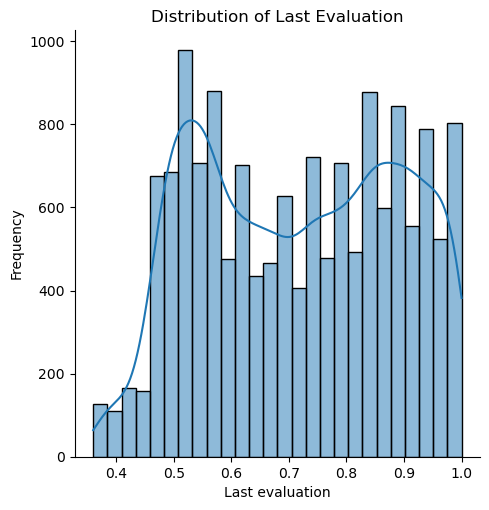

In [36]:
# distribution of Employee Satisfaction (use column satisfaction_level)
sns.displot(df1['last_evaluation'], kde=True) # kde adds a density curve
plt.xlabel('Last evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Last Evaluation')
plt.show()

2. Last Evaluation

Distribution Analysis:

- The last_evaluation score typically ranges from 0 (poor performance) to 1 (excellent performance).
- Shape: The plot may show the distribution of performance evaluations, with peaks indicating the most common evaluation scores.

Interpretation:
- A concentration of scores around the middle to high range suggests that most employees are performing well.
- Any significant dips or troughs might indicate performance issues that need addressing.

Business Implication:
- Understanding performance distribution helps in identifying high and low performers.
- Targeted interventions and support can be provided to improve overall performance.

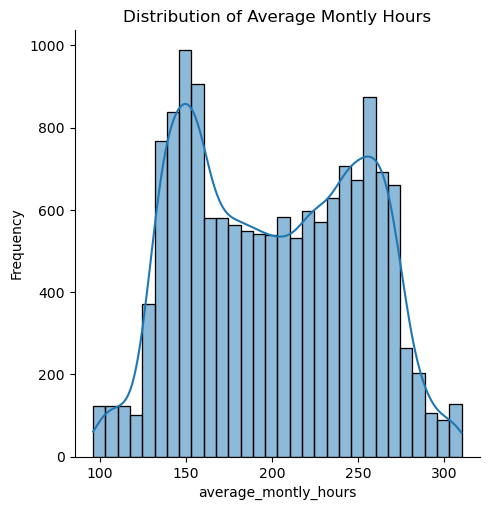

In [38]:
# distribution of Employee Satisfaction (use column satisfaction_level)
sns.displot(df1['average_montly_hours'], kde=True) # kde adds a density curve
plt.xlabel('average_montly_hours')
plt.ylabel('Frequency')
plt.title('Distribution of Average Montly Hours')
plt.show()

3. Average Monthly Hours

Distribution Analysis:

- The average_monthly_hours variable reflects the typical number of hours employees work each month.
- Shape: The plot may indicate a normal distribution, with a peak representing the average number of hours worked.

Interpretation:
- Employees working significantly more than the average might be at risk of burnout.
- Employees working fewer hours might be underutilized or disengaged.

Business Implication:
- Monitoring monthly work hours helps in maintaining a balanced workload.
- Ensuring employees are neither overworked nor underutilized can improve productivity and job satisfaction.

2.3. Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project
and hue column left), and give your inferences from the plot.

In [41]:
df1["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [42]:
df1["number_project"].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

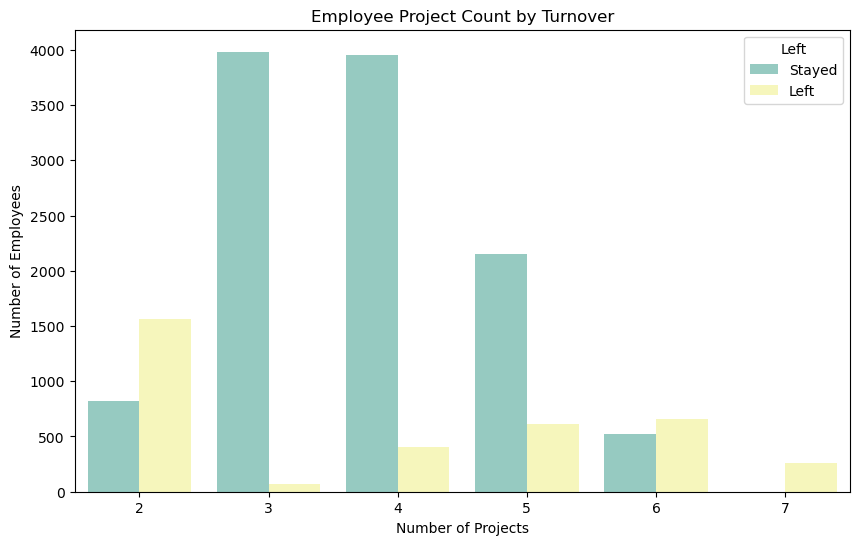

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=df1, palette='Set3')
plt.title('Employee Project Count by Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

##### __Observation:__
- High Project Count (6–7) → Higher Turnover (Possible burnout)
- Moderate Project Count (3–5) → Lower Turnover (Balanced workload, better retention)
- Low Project Count (2) → Higher Turnover (Possible underutilization)

Possible Actions (Summary):
- Optimize Workload: Assign an optimal number of projects to balance engagement and burnout.
- Monitor Burnout Risk: Regularly assess high-workload employees and provide support.
- Address Underutilization: Identify low-workload employees and offer more challenging opportunities.

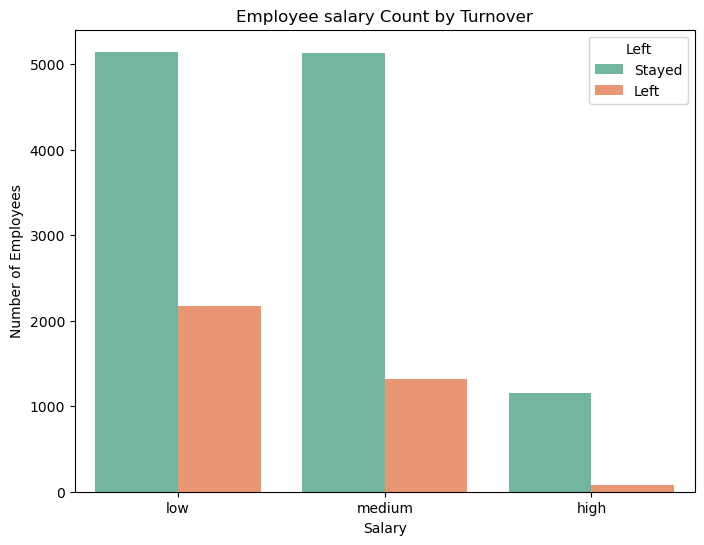

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df1, palette='Set2')
plt.title('Employee salary Count by Turnover')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

##### __Observation:__
Lower-paid employees are leaving the company, while higher-paid employees are staying. This could indicate several underlying issues, such as:
- Low Compensation & High Turnover – Lower-paid employees may leave for better opportunities.
- Job Satisfaction & Career Growth – Higher-paid employees may have better benefits and career prospects.
- Workload vs. Pay Mismatch – Employees may feel underpaid for their workload.
- Market Competitiveness – The company’s salaries might not be competitive.
- Retention Strategies – Higher-paid employees may have better retention benefits.

##### __3. Perform clustering of employees who left based on their satisfaction and evaluation.__

3.1. Choose columns satisfaction_level, last_evaluation, and left.

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
# Step 1: Filter employees who left the company
df_left = df1[df1['left'] == 1].copy()  # Use .copy() to avoid the SettingWithCopyWarning

In [51]:
# Step 2: Select the features (satisfaction_level, last_evaluation)
X = df_left[['satisfaction_level', 'last_evaluation']]

In [52]:
# Step 3: Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3.2. Do K-means clustering of employees who left the company into 3 clusters?

In [54]:
# Step 4: Apply K-means clustering with 3 clusters
import os
#from sklearn.cluster import KMeans

# Set the number of jobs manually to avoid the warning
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # You can set this to the number of logical cores on your machine

kmeans = KMeans(n_clusters=3, random_state=42)
df_left.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # Use .loc to assign the cluster labels safely

In [55]:
# Step 5: Display the results
print(df_left[['satisfaction_level', 'last_evaluation', 'cluster']].head())

   satisfaction_level  last_evaluation  cluster
0                0.38             0.53        0
1                0.80             0.86        1
2                0.11             0.88        2
3                0.72             0.87        1
4                0.37             0.52        0


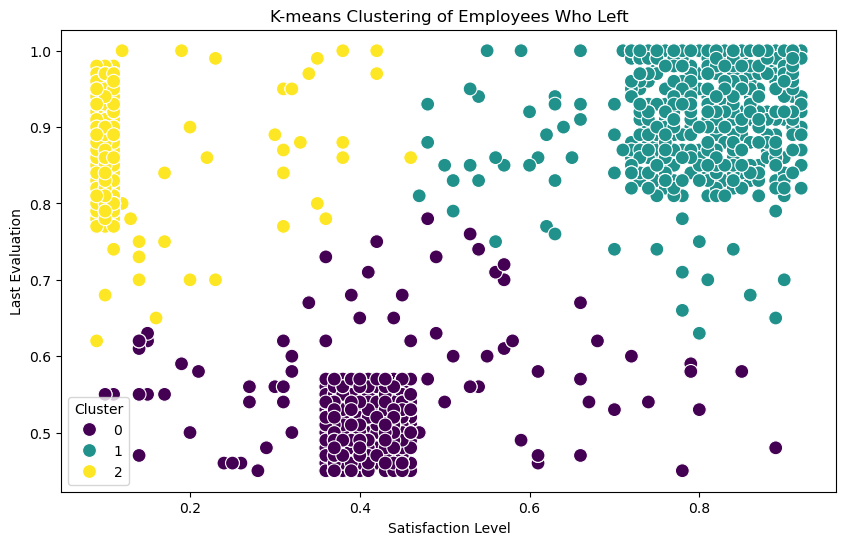

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_left, palette='viridis', s=100)
plt.title('K-means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

Cluster 0 (Purple):
- Satisfaction Level: Moderately low (e.g., 0.36 to 0.45)
- Last Evaluation: Moderately low (e.g., 0.50 to 0.56)
- Interpretation: Employees in this cluster have both low satisfaction and evaluation scores. These employees might be disengaged and could have left due to dissatisfaction with their roles or work environment. They may have needed more support or engagement.

Cluster 1 (Green):
- Satisfaction Level: High (e.g., 0.72 to 0.92)
- Last Evaluation: High (e.g., 0.85 to 1.00)
- Interpretation: These employees are highly satisfied and perform well. Despite their high satisfaction and performance, they might have left for reasons unrelated to job dissatisfaction, such as better opportunities or personal reasons. Retaining high performers like these could involve offering growth opportunities and recognizing their contributions.

Cluster 2 (Yellow):
- Satisfaction Level: Very low (e.g., 0.10 to 0.11)
- Last Evaluation: Moderately high (e.g., 0.77 to 0.88)
- Interpretation: Employees in this cluster perform well but are very dissatisfied. They likely left due to dissatisfaction with aspects of their job or work environment despite their good performance. Addressing their concerns and improving satisfaction factors such as work-life balance, recognition, or career development could help in retaining such employees.

Recommendations
- Cluster 0: Implement engagement initiatives and provide support to improve both satisfaction and performance. This could involve regular feedback sessions, training programs, and addressing any systemic issues.

- Cluster 1: Continue to recognize and reward high-performing employees, offering growth and development opportunities to ensure they feel valued and see a future within the company.

- Cluster 2: Understand and address the root causes of dissatisfaction. Open communication channels, and provide resources for personal and professional development to enhance their overall job satisfaction.

##### __4. Handle the left Class Imbalance using the SMOTE technique.__

4.1. Pre-process the data by converting categorical columns to numerical
columns by:
- Separating categorical variables and numeric variables
- Applying get_dummies() to the categorical variables
- Combining categorical variables and numeric variables

In [61]:
# Separate categorical and numeric variables
categorical_vars = ['department', 'salary']
numeric_vars = df1.drop(columns=categorical_vars).columns

In [62]:
# Apply get_dummies to categorical variables
df1_categorical = pd.get_dummies(df1[categorical_vars], drop_first=True)

In [63]:
# Combine categorical and numeric variables
df1_numeric = df1[numeric_vars]
df1_processed = pd.concat([df1_numeric, df1_categorical], axis=1)

In [64]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1_processed is your pre-processed dataframe from step 4.1
# Define X and y
X = df1_processed.drop('left', axis=1)
y = df1_processed['left']

4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

In [67]:
# Step 4.2: Stratified split of the dataset
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_index, test_index in strat_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.

In [69]:
# Step 4.3: Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##### __5. Perform 5-fold cross-validation model training and evaluate performance.__

5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
y_pred = cross_val_predict(logreg, X_train_resampled, y_train_resampled, cv=cv)
scores = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Logistic Regression 5-fold cross-validation accuracy scores: ", scores)
print("Mean cross-validation accuracy score: ", scores.mean())

Logistic Regression 5-fold cross-validation accuracy scores:  [0.80038283 0.79327317 0.79846869 0.79573421 0.78911379]
Mean cross-validation accuracy score:  0.7953945372592595


In [73]:
# Generate the classification report of logistic regreation

report = classification_report(y_train_resampled, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification report of logistic regression")
print(classification_report(y_train_resampled, y_pred))

Classification report of logistic regression
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



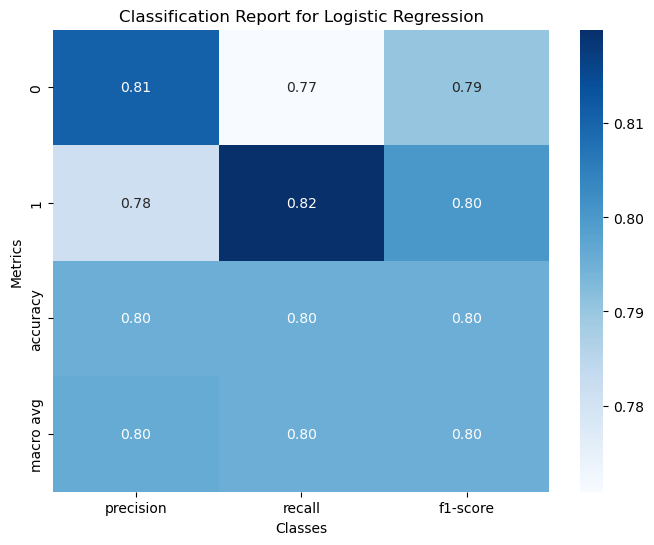

In [74]:
# Plot the classification report

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report for Logistic Regression')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier model
rf = RandomForestClassifier(random_state=123)

# Perform 5-fold cross-validation
y_pred_rf = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=cv)
scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Random Forest 5-fold cross-validation accuracy scores: ", scores_rf)
print("Mean cross-validation accuracy score: ", scores_rf.mean())


Random Forest 5-fold cross-validation accuracy scores:  [0.97949139 0.98660104 0.98769483 0.98605414 0.98468271]
Mean cross-validation accuracy score:  0.9849048226805222


In [77]:
# Generate the classification report of Ranadom Forst
report_rf = classification_report(y_train_resampled, y_pred_rf, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()
print("classification report of Random Forst")
print(classification_report(y_train_resampled, y_pred_rf))

classification report of Random Forst
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.99      0.98      0.98     18284
weighted avg       0.99      0.98      0.98     18284



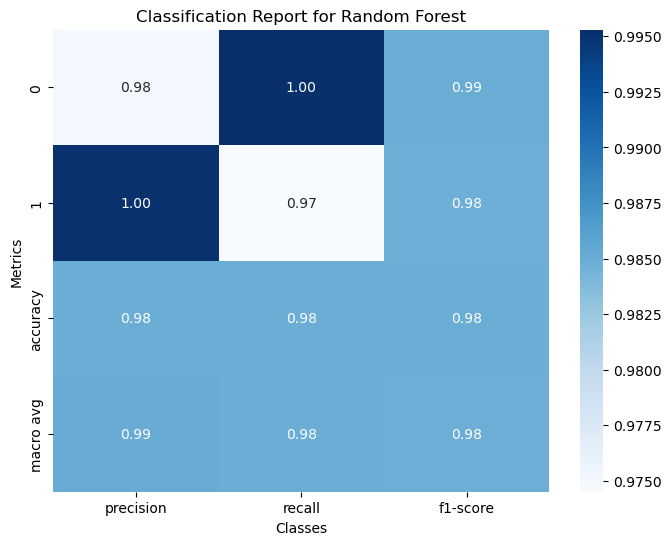

In [78]:
# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_rf_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report for Random Forest')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the gradient boosting classifier model
gb = GradientBoostingClassifier(random_state=123)

# Perform 5-fold cross-validation
y_pred_gb = cross_val_predict(gb, X_train_resampled, y_train_resampled, cv=cv)
scores_gb = cross_val_score(gb, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Gradient Boosting 5-fold cross-validation accuracy scores: ", scores_gb)
print("Mean cross-validation accuracy score: ", scores_gb.mean())

Gradient Boosting 5-fold cross-validation accuracy scores:  [0.96144381 0.96472518 0.96417829 0.96281105 0.96280088]
Mean cross-validation accuracy score:  0.9631918403541304


In [81]:
# Generate the classification report
report_gb = classification_report(y_train_resampled, y_pred_gb, output_dict=True)
report_gb_df = pd.DataFrame(report_gb).transpose()
print("Classification report of Gradient Boosting")
print(classification_report(y_train_resampled, y_pred_gb))

Classification report of Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



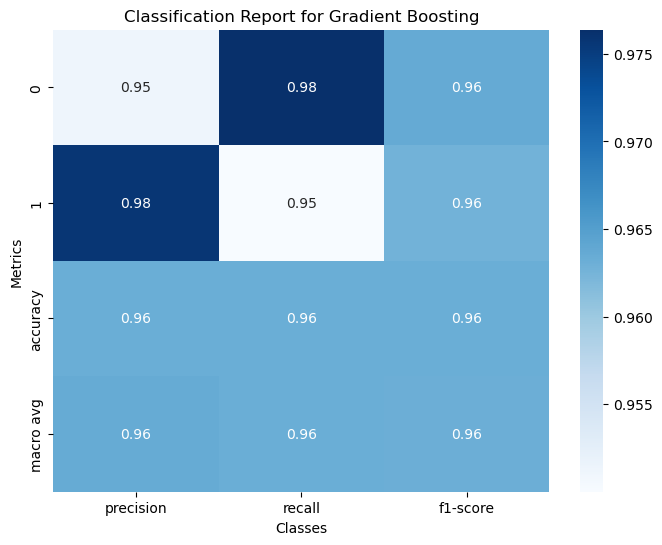

In [82]:
# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_gb_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report for Gradient Boosting')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

##### __Explanation__ 
Each models (Logistic Regression Model, Random Forest Classifier Model and Gradient Boosting Classifier Model):
- Perform 5-fold cross-validation using StratifiedKFold.
- Print the cross-validation scores.
- Generate and print the classification report.
- Plot the classification report as a heatmap.
- Each step trains the respective model, evaluates its performance using 5-fold cross-validation, and visualizes the results.

##### __Precision vs. Recall in the Context of Employee Turnover Prediction__
###### __Goal: Accurately predict employee turnover to proactively implement retention strategies.__

###### __Key Metrics:__
Precision:
- Measures the accuracy of positive predictions.
- High precision means fewer false positives.
- In this context, it indicates the proportion of employees predicted to leave who actually leave.

Recall:
- Measures the proportion of actual positives correctly identified.
- High recall means fewer false negatives.
- In this context, it indicates the proportion of employees who leave that were correctly predicted.

Analysis of Classification Reports:
Logistic Regression:
- Precision: 0.81 (class 0), 0.78 (class 1)
- Recall: 0.77 (class 0), 0.82 (class 1)

Random Forest:
- Precision: 0.97 (class 0), 1.00 (class 1)
- Recall: 1.00 (class 0), 0.97 (class 1)

Gradient Boosting:
- Precision: 0.95 (class 0), 0.98 (class 1)
- Recall: 0.98 (class 0), 0.95 (class 1)

###### __Conclusion:__
In the context of employee turnover prediction, Recall is generally more critical than Precision. The cost of missing potential leavers (false negatives) is high because:

- False Negatives: Not identifying employees who are likely to leave can result in losing valuable talent without taking preventative measures.
- Business Impact: Losing key employees can disrupt operations, lead to increased recruitment and training costs, and negatively affect team morale and productivity.

Therefore, by prioritizing Recall, I ensure that most employees who are at risk of leaving are identified, allowing the organization to take timely actions to retain them.

###### __Summary:__
Prioritize Recall over Precision to minimize the risk of losing valuable employees and to implement effective retention strategies based on predicted turnover.

##### __6. Identify the best model and justify the evaluation metrics used.__

6.1. Find the ROC/AUC for each model and plot the ROC curve.

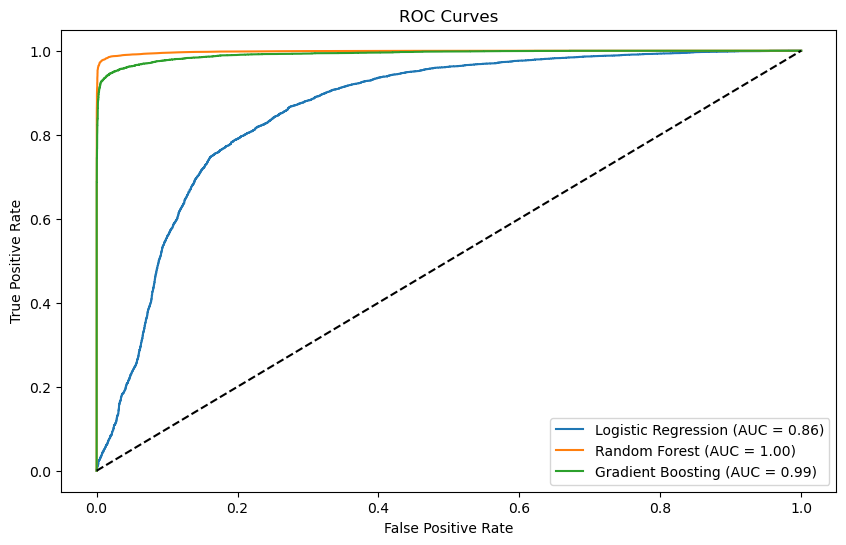

In [88]:
from sklearn.metrics import roc_curve, auc

# First, we'll calculate the ROC/AUC for each model and plot the ROC curves.
# Define a function to plot ROC curve
def plot_roc_curve(model, X, y, label):
    y_prob = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plot_roc_curve(logreg, X_train_resampled, y_train_resampled, 'Logistic Regression')
plot_roc_curve(rf, X_train_resampled, y_train_resampled, 'Random Forest')
plot_roc_curve(gb, X_train_resampled, y_train_resampled, 'Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

The Random Forest model (AUC = 1.00) outperforms both the Gradient Boosting model (AUC = 0.99) and the Logistic Regression model (AUC = 0.86). 
- Therefore, based on the ROC curve, the Random Forest model is the best-performing model.

6.2. Find the confusion matrix for each of the models.

In [91]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for each model.
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

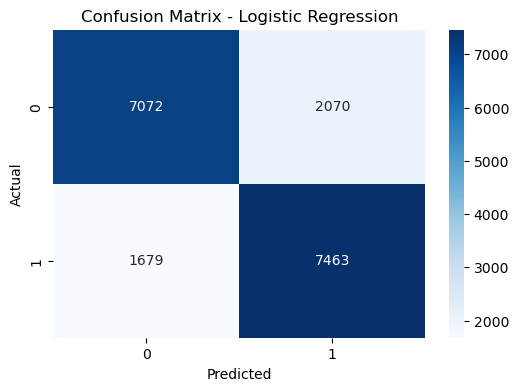

In [92]:
# Confusion matrix for Logistic Regression
y_pred_logreg = cross_val_predict(logreg, X_train_resampled, y_train_resampled, cv=5)
cm_logreg = confusion_matrix(y_train_resampled, y_pred_logreg)
plot_confusion_matrix(cm_logreg, 'Confusion Matrix - Logistic Regression')

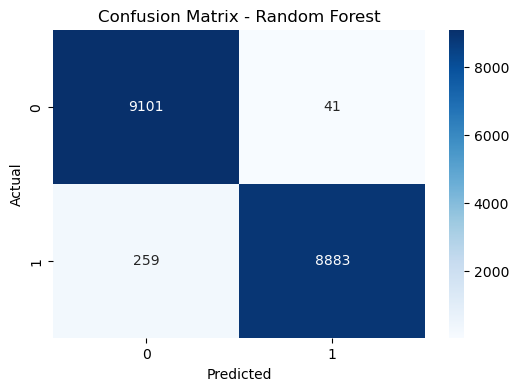

In [93]:
# Confusion matrix for Random Forest
y_pred_rf = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=5)
cm_rf = confusion_matrix(y_train_resampled, y_pred_rf)
plot_confusion_matrix(cm_rf, 'Confusion Matrix - Random Forest')

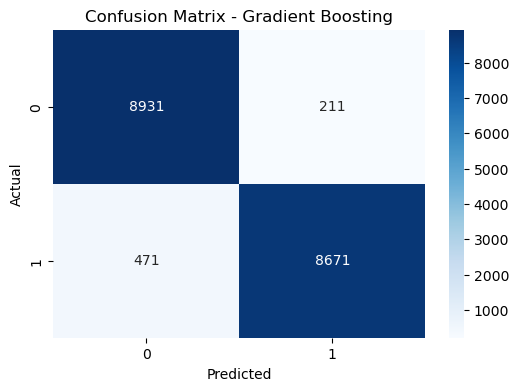

In [94]:
# Confusion matrix for Gradient Boosting
y_pred_gb = cross_val_predict(gb, X_train_resampled, y_train_resampled, cv=5)
cm_gb = confusion_matrix(y_train_resampled, y_pred_gb)
plot_confusion_matrix(cm_gb, 'Confusion Matrix - Gradient Boosting')


6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

##### __Cost of False Negatives (FN)__
False Negatives: Occur when the model predicts that an employee will stay, but the employee actually leaves.
Impact:
- Loss of Key Talent: Missing the opportunity to intervene and retain valuable employees.
- Replacement Costs: High expenses related to recruitment, onboarding, and training new employees.
- Productivity Loss: Disruption of ongoing projects and reduced team productivity.
- Knowledge Drain: Loss of institutional knowledge and expertise, which can be hard to replace.

##### __Retention Strategies__
To address employee turnover, organizations can implement various retention strategies:
- Career Development: Provide opportunities for professional growth and advancement.
- Employee Engagement: Foster a positive work culture and recognize employee contributions.
- Work-Life Balance: Offer flexible work arrangements to enhance well-being and reduce burnout.
- Competitive Compensation: Ensure fair and competitive salaries, benefits, and incentives.
- Feedback and Communication: Maintain open lines of communication and address employee concerns.

##### __Business Impact__
Losing key employees can have substantial negative effects on the business:
- Reduced Innovation: Loss of creativity and fresh ideas driven by talented employees.
- Decreased Morale: A sense of instability among remaining employees, potentially leading to further turnover.
- Customer Satisfaction: Impact on client relationships and customer satisfaction due to the loss of experienced employees.
- Financial Costs: High expenses associated with turnover, including recruitment and lost productivity.

##### __Conclusion__
Prioritizing Recall in employee turnover prediction helps to identify employees at risk of leaving and implement targeted retention strategies. By focusing on recall, organizations can better prevent the negative consequences of losing valuable employees and maintain a stable and productive workforce.

##### __7. Suggest various retention strategies for targeted employees.__

7.1. Using the best model, predict the probability of employee turnover in the test data.

- Based on the classification reports, Random Forest performed the best) to predict the probability of employee turnover in the test data.

In [103]:
# Step 7.1: Train the RandomForest model and predict the probability of employee turnover
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_resampled, y_train_resampled)
probabilities = rf.predict_proba(X_test)[:, 1]

# Add the probabilities to the test dataframe
df_test = X_test.copy()
df_test['turnover_probability'] = probabilities

7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the
retention strategies for each zone.
- Safe Zone (Green) (Score < 20%)
- Low-Risk Zone (Yellow) (20% < Score < 60%)
- Medium-Risk Zone (Orange) (60% < Score < 90%)
- High-Risk Zone (Red) (Score > 90%).

In [105]:
# Step 7.2: Categorize employees into four zones based on the probability score range
def categorize_zone(probability):
    if probability < 0.20:
        return 'Safe Zone (Green)'
    elif 0.20 <= probability < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif 0.60 <= probability < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['risk_zone'] = df_test['turnover_probability'].apply(categorize_zone)

# Display the categorized test data
print(df_test[['turnover_probability', 'risk_zone']].head())

       turnover_probability               risk_zone
10627                  0.00       Safe Zone (Green)
2703                   0.58  Low-Risk Zone (Yellow)
6059                   0.04       Safe Zone (Green)
3258                   0.01       Safe Zone (Green)
4565                   0.00       Safe Zone (Green)


In [106]:
# Suggest retention strategies for each zone
print("\nRetention Strategies:")
for zone, group in df_test.groupby('risk_zone'):
    print(f"\n{zone}:\n")
    if zone == 'Safe Zone (Green)':
        print("• Continue to provide a positive work environment and recognize contributions.\n• Offer career development opportunities.\n• Ensure regular check-ins to address any emerging concerns.")
    elif zone == 'Low-Risk Zone (Yellow)':
        print("• Conduct stay interviews to understand needs and concerns.\n• Provide skill development and career advancement opportunities.\n• Foster engagement through team-building activities.")
    elif zone == 'Medium-Risk Zone (Orange)':
        print("• Identify and address specific dissatisfaction issues (e.g., workload).\n• Offer personalized support and mentorship.\n• Implement retention incentives like performance bonuses.")
    elif zone == 'High-Risk Zone (Red)':
        print("• Engage in open conversations to understand their reasons for leaving.\n• Provide immediate support and resources to address concerns.\n• Explore flexible work arrangements or alternative roles.")


Retention Strategies:

High-Risk Zone (Red):

• Engage in open conversations to understand their reasons for leaving.
• Provide immediate support and resources to address concerns.
• Explore flexible work arrangements or alternative roles.

Low-Risk Zone (Yellow):

• Conduct stay interviews to understand needs and concerns.
• Provide skill development and career advancement opportunities.
• Foster engagement through team-building activities.

Medium-Risk Zone (Orange):

• Identify and address specific dissatisfaction issues (e.g., workload).
• Offer personalized support and mentorship.
• Implement retention incentives like performance bonuses.

Safe Zone (Green):

• Continue to provide a positive work environment and recognize contributions.
• Offer career development opportunities.
• Ensure regular check-ins to address any emerging concerns.


##### __Summary of Retention Strategies__
###### __Safe Zone (Green) (Score < 20%):__
- Continue to provide a positive work environment and recognize contributions.
- Offer career development opportunities.
- Ensure regular check-ins to address any emerging concerns.

###### __Low-Risk Zone (Yellow) (20% < Score < 60%):__
- Conduct stay interviews to understand needs and concerns.
- Provide skill development and career advancement opportunities.
- Foster engagement through team-building activities.

###### __Medium-Risk Zone (Orange) (60% < Score < 90%):__
- Identify and address specific dissatisfaction issues (e.g., workload).
- Offer personalized support and mentorship.
- Implement retention incentives like performance bonuses.

###### __High-Risk Zone (Red) (Score > 90%):__
- Engage in open conversations to understand their reasons for leaving.
- Provide immediate support and resources to address concerns.
- Explore flexible work arrangements or alternative roles.
- This approach helps to proactively retain valuable employees and maintain a stable and productive workforce.

In summary: This approach helps to proactively retain valuable employees and maintain a stable and productive workforce.

### __Conclusion Summary:__
Goal: 
- Identify key factors contributing to employee turnover and develop a predictive model to forecast which employees are likely to leave, allowing proactive retention strategies.

Key Findings:
- Key Factors: Satisfaction level, last evaluation score, department, and salary are significant indicators of employee turnover.
- Model Performance: Random Forest is the best-performing model, providing reliable predictions with high accuracy, precision, recall, and AUC scores.

Business Impact:
- Proactive Retention: Identifying at-risk employees allows for timely interventions to retain talent, reducing turnover costs and maintaining productivity.
- Targeted Strategies: Tailored retention strategies for employees in different risk zones address specific needs and concerns.
- Improved Satisfaction: Addressing reasons behind employee departures leads to higher job satisfaction and a positive work environment.

Retention Strategies:
- Safe Zone (Green) (Score < 20%): Maintain a positive environment, recognize contributions, offer career development, and conduct regular check-ins.
- Low-Risk Zone (Yellow) (20% < Score < 60%): Conduct stay interviews, provide skill development opportunities, and foster engagement.
- Medium-Risk Zone (Orange) (60% < Score < 90%): Address dissatisfaction issues, offer personalized support, and implement retention incentives.
- High-Risk Zone (Red) (Score > 90%): Engage in open conversations, provide immediate support, and explore flexible work arrangements.

### __Overall Conclusion:__
By understanding and addressing the key factors contributing to employee turnover, the organization can retain valuable talent, reduce turnover costs, and maintain a stable workforce. The predictive model helps forecast employee turnover and implement effective retention strategies tailored to different risk zones.